In [1]:
# Load modules

import sys
sys.path.append("..")
    
import numpy as np
import matplotlib.pyplot as plt

from infer.gibbs import gibbs_sampling, gmm_gen

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Data loading

_data = np.array(np.loadtxt("./data/mixture1.txt"))

C = _data[:, 0] - 1
X = _data[:, 1:]

N, D = X.shape
K = len(np.unique(C))

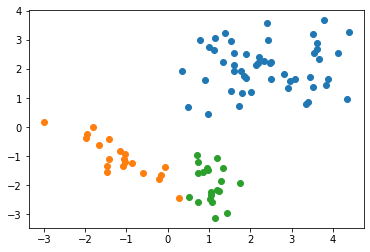

In [3]:
# Plot X

def plot_scatter(X, C):
    for k in np.unique(C):
        _X = X[C == k]
        plt.scatter(_X[:, 0], _X[:, 1])
    
plot_scatter(X, C)    

In [4]:
# Gibbs sampling

n_iter = 100
ss = gibbs_sampling(X, K, n_iter)

In [5]:
# Helper functions

def sample_kd(smpl_dict, param_nm, D, k, d):
    smpl_list = smpl_dict[param_nm]
    return np.array(smpl_list).reshape(len(smpl_list), -1)[:, k*D + d]


def sample_k(smpl_dict, param_nm, k):
    smpl_list = smpl_dict[param_nm]
    return np.array(smpl_list).reshape(len(smpl_list), -1)[:, k]

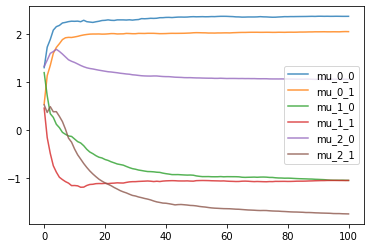

In [6]:
# Plot sampled mu

def plot_mu(smpl_dict, K, D):
    for k in range(K):
        for d in range(D):
            mu_k_d = sample_kd(smpl_dict, "mu", D, k, d)
            # print(k, d, mu_k_d)
            cum_mean = [ mu_k_d[0:(n+1)].mean() for n in range(len(mu_k_d)) ]
            plt.plot(cum_mean, alpha=0.8, label=f"mu_{k}_{d}")
    plt.legend()
plot_mu(ss, K, D)

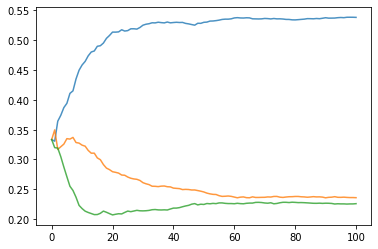

In [7]:
# Plot sampled pi

def plot_pi(smpl_dict, K):
    for k in range(K):
        pi_k = sample_k(smpl_dict, "pi", k)
        cum_val = [ pi_k[0:(n+1)].mean() for n in range(len(pi_k)) ]
        plt.plot(cum_val, alpha=0.8, label=f"pi_{k}")    
plot_pi(ss, K)        

In [8]:
# Inference of class of points

def infer_C(ss):
    _S = sum(ss["S"]) / len(ss["S"])
    
    C = []
    for _s_n in _S:
        c_n = _s_n.argsort()[-1]
        C += [c_n]
    return np.array(C)

C_pred = infer_C(ss)

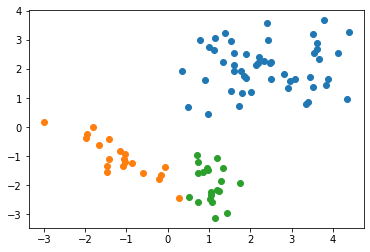

In [9]:
# Plot infered result

plot_scatter(X, C_pred)